#INTRODUCTION

**Objective**

Predicting airline passenger satisfaction using random forest, gradient boosting, and KNN.

**Dataset**

https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?resource=download

**Data Dictionary:**

1. **ID**: Unique passenger identifier

2. **Gender**: Gender of the passenger (Female/Male)

3. **Age**: Age of the passenger

4. **Customer Type**: Type of airline customer (First-time/Returning)

5. **Type of Travel**: Purpose of the flight (Business/Personal)

6. **Class**: Travel class in the airplane for the passenger seat

7. **Flight Distance**: Flight distance in miles

8. **Departure & Arrival Delay**: Flight departure & arrival delay in minutes

9. **Satisfaction**: Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)

*`"Satisfaction level from 1 (lowest) to 5 (highest) - 0 means ""not applicable""`*

10. **Departure & Arrival Time Convenience**

11. **Ease of Online Booking**

12. **Check-in Service**

13. **Online Boarding**

14. **Gate Location**

15. **On-board Service**

16. **Seat Comfort**

17. **Leg Room Service**

18. **Cleanliness**

19. **Food and Drink**

20. **In-flight Service**

21. **In-flight Wifi Service**

22. **In-flight Entertainment**

23. **Baggage Handling**





#LIBRARY

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp - DS/FinPro/airline_passenger_satisfaction.csv')
print('Total Row : ', len(df))
df.head(5)

Total Row :  129880


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


#DATA UNDERSTANDING

##Describe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

##Missing Value

In [ ]:
null_value = (129880 - 129487 ) /129880
percentage = null_value * 100

print("missing value = {:.1f}%".format(percentage))

missing value = 0.3%


#DATA PREPARATION

##Handling Missing Value

Since there are very few missing values, the rows containing missing values will be dropped.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

**NO MORE MISSING VALUE DETECTED**

##Check the Duplicated Data

In [ ]:
df.duplicated().sum()

0

#STATISTICAL SUMMARY

In [ ]:
# select columns with categorical data and save column names
categoricals = list(df.select_dtypes(include=['object']).columns)

# select columns with numerical data and save column names
numericals = list(df.select_dtypes(include=['float', 'int']).columns)

categorical_count = len(df.select_dtypes(include=['object']).columns)
numerical_count = len(df.select_dtypes(include=['float', 'int']).columns)


# print column names
print('Categorical columns:', categorical_count,"->", categoricals)
print('Numerical columns:', numerical_count, "->",numericals)

Categorical columns: 5 -> ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
Numerical columns: 19 -> ['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


##Numerical columns

In [ ]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129487.0,64958.335169,37489.781165,1.0,32494.5,64972.0,97415.5,129880.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129487.0,14.643385,37.932867,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Check-in Service,129487.0,3.306239,1.266146,0.0,3.0,3.0,4.0,5.0
Online Boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Gate Location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0


In [ ]:
filtered_columns = [col for col in numericals if df[col].mean() > df[col].median()]

# print filtered columns
print('Numerical columns with mean greater than median:', filtered_columns)

Numerical columns with mean greater than median: ['Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Check-in Service', 'Online Boarding', 'Cleanliness', 'Food and Drink']


**OBSERVATION:**

 Min-Max gap per column:

*   `ID` is a key value so we can ignore
*   `Age` has normal gap

*   `Flight Distance`,	`Departure Delay`,	`Arrival Delay` the gap is too big, not normal.
*   For the remaining columns, since they have only 1-5 unique values, they can be ignored when looking at their minimum and maximum values.

columns with skewed distribution because mean > median :

`Flight Distance`, `Departure Delay`, `Arrival Delay`, `Departure and Arrival Time Convenience`, `Check-in Service`, `Online Boarding`, `Cleanliness`, `Food and Drink`


##Categorical Columns

In [ ]:
df[categoricals].describe()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65703,105773,89445,61990,73225


**OBSERVATION:**

1. There are more female customers than male customers and more returning customers than new customers. The majority of the travel records are for business travel and business class, while the majority of the customers were neutral or dissatisfied with their travel experience.

2. The frequency percentage of Neutral or Dissatisfied passenger is 56% so this dataset is **imbalanced** 


#Outlier Detection

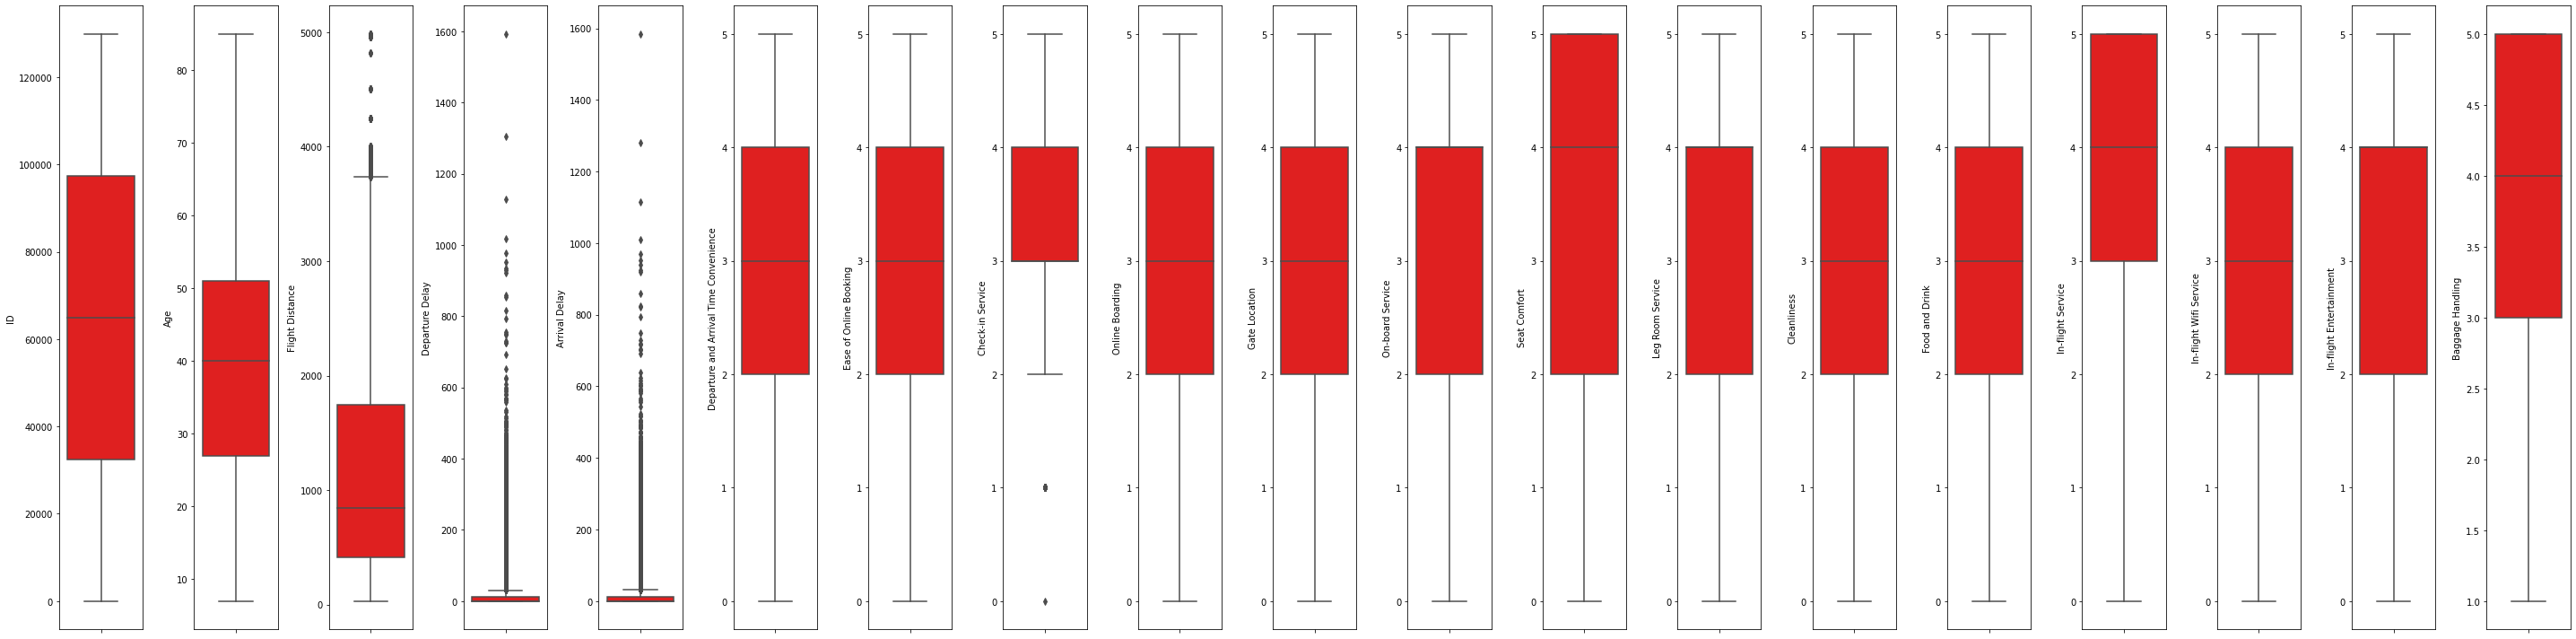

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(40,10))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

**OBSERVATIONS:**

Columns `Flight Distance`,	`Departure Delay`, `Arrival Delay`, and `Check-in Service` has outliers

#Transform Categorical Columns

In [ ]:
for col in categoricals:
    print(f"Unique values of {col}: {df[col].unique()}")

Unique values of Gender: ['Male' 'Female']
Unique values of Customer Type: ['First-time' 'Returning']
Unique values of Type of Travel: ['Business' 'Personal']
Unique values of Class: ['Business' 'Economy' 'Economy Plus']
Unique values of Satisfaction: ['Neutral or Dissatisfied' 'Satisfied']


###One-hot encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

###Label encoding

In [ ]:
df_encoded['Satisfaction'] = (df_encoded['Satisfaction'] != 'Satisfied').astype(int)


In [ ]:
# Reorder column
df_encoded = df_encoded[['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',
       'Gender_Female', 'Gender_Male', 'Customer Type_First-time',
       'Customer Type_Returning', 'Type of Travel_Business',
       'Type of Travel_Personal', 'Class_Business', 'Class_Economy',
       'Class_Economy Plus','Satisfaction']]

In [ ]:
df_encoded.head(3)

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Satisfaction
0,1,48,821,2,5.0,3,3,4,3,3,...,0,1,1,0,1,0,1,0,0,1
1,2,35,821,26,39.0,2,2,3,5,2,...,1,0,0,1,1,0,1,0,0,0
2,3,41,853,0,0.0,4,4,4,5,4,...,0,1,0,1,1,0,1,0,0,0


# Target Column Distribution

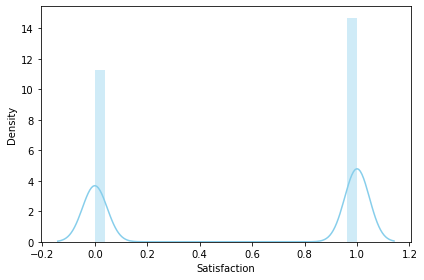

In [ ]:
sns.distplot(x=df_encoded['Satisfaction'], color='skyblue')
plt.xlabel('Satisfaction')
plt.tight_layout()

**OBSERVATION:**

the class distribution is skewed towards the Neutral or Dissatisfied class. It shows that this dataset is slightly imbalanced

#EDA

##Correlation Heatmap (encoded feature)

<Axes: >

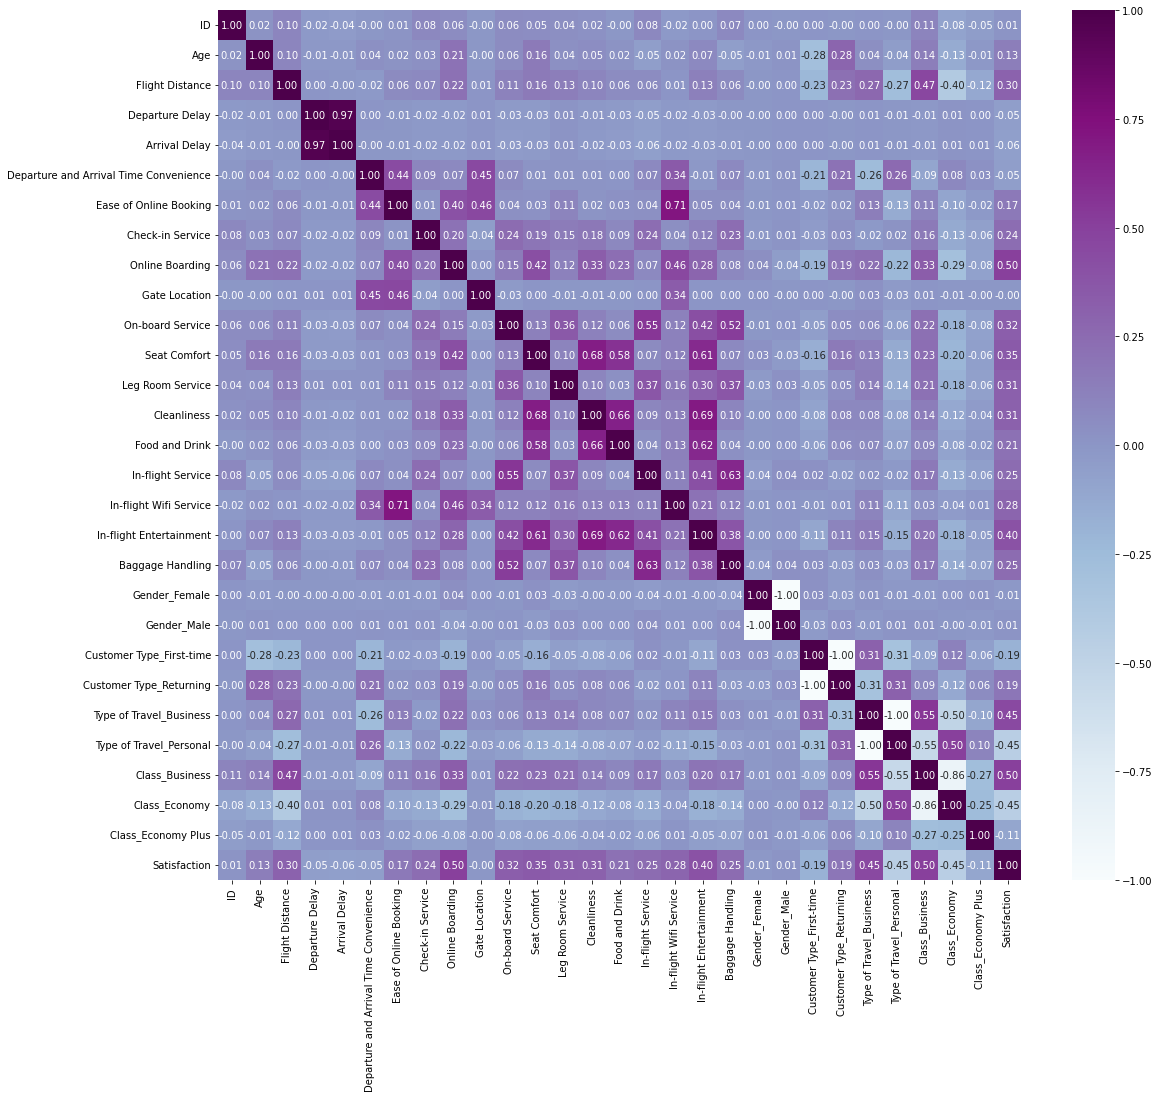

In [ ]:
correlation = df_encoded.corr()
plt.figure(figsize = (18, 16))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BuPu')

**Observations:**

Departure delay and arrival delay are highly correlated with each other. 0.97 shows strong positive correlation this means that as departure delays increase, there is a very strong tendency for arrival delays to also increase. In other words, flights that experience longer departure delays are likely to arrive later than those that experience shorter departure delays.

In any case, this strong correlation highlights the importance of managing departure delays in order to minimize the impact on arrival times and improve overall airline efficiency.

##Age

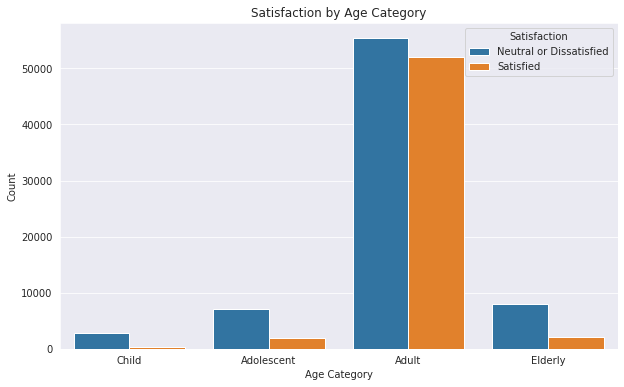

In [ ]:
# create a new DataFrame from the 'df' DataFrame
df_age = df[['ID', 'Age', 'Satisfaction']]

# create a function to map ages to categories
def age_category(age):
    if age <= 10:
        return 'Child'
    elif age <= 19:
        return 'Adolescent'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

# create a new column 'Age Category' based on 'Age' column
df_age['Age Category'] = df_age['Age'].apply(age_category)

ageorder = ['Child', 'Adolescent', 'Adult', 'Elderly']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
# create a countplot of the number of satisfied individuals in each age category
sns.countplot(data=df_age, x='Age Category', hue='Satisfaction', order=ageorder)

# add titles and labels
plt.title('Satisfaction by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

# show the plot
plt.show()


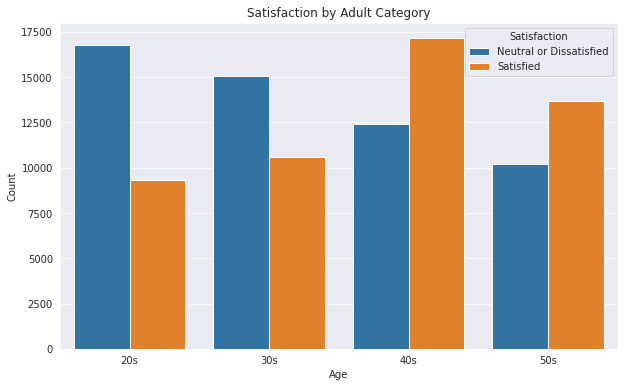

In [ ]:
# define a function to map ages to adult categories
def adult_category(age):
    if age <= 19:
        return 'not adult'
    elif age <= 29:
        return '20s'
    elif age <= 39:
        return '30s'
    elif age <= 49:
        return '40s'
    elif age <= 59:
        return '50s'
    else:
        return 'others'

# create a new DataFrame from the 'df' DataFrame
df_age = df[['ID', 'Age', 'Satisfaction']]

# create a new column 'Adult Category' based on 'Age' column
df_age['Adult Category'] = df_age['Age'].apply(adult_category)

# filter the DataFrame to exclude rows where 'Adult Category' is 'not adult' or '>60 yo'
df_age_filtered = df_age[(df_age['Adult Category'] != 'not adult') & (df_age['Adult Category'] != 'others')]

adultorder = ['20s','30s','40s','50s']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
# create a countplot of the number of satisfied individuals in each adult category
sns.countplot(data=df_age_filtered, x='Adult Category', hue='Satisfaction',order=adultorder)

# add titles and labels
plt.title('Satisfaction by Adult Category')
plt.xlabel('Age')
plt.ylabel('Count')

# show the plot
plt.show()


**Objectives (from 2 tables above):**

1. All age categories are mostly neutral or dissatisfied.

2.  Most of the passenger are adult age 20-60. dominated by age 40.

3. In adult passenger categories, the older the passengers, the total of neutral or dissatisfaction passengers decreases.

4. The most satisfied passengers are passengers in their 40s

##Flight Distance

In [ ]:
df_dist = df[['ID', 'Flight Distance', 'Satisfaction']]
df_dist['Distance (km)'] = df_dist['Flight Distance'] * 1.60934

def distance_category(distance):
    if distance < 1000:
        return '1,100–1,500 km'
    elif distance < 4100:
        return '1,500 - 4,099 km' #ini klo diubah jd 4,100 datanya gamau muncul, knp?
    else:
        return '>4,100 km'

df_dist['Distance Category'] = df_dist['Distance (km)'].apply(distance_category)


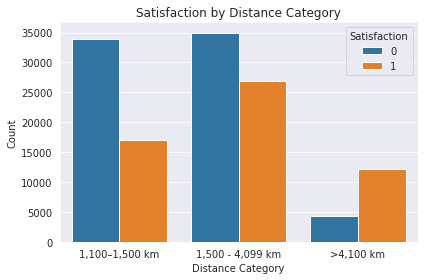

In [ ]:
distorder = ['1,100–1,500 km', '1,500 - 4,099 km', '>4,100 km']
sns.countplot(data=df_dist, x='Distance Category', hue='Satisfaction', order=distorder)


# add titles and labels
plt.title('Satisfaction by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.tight_layout()

# show the plot
plt.show()


**Objectives:**

1. This airline passenger are mostly have medium haul flight (1,500 - 4100 KM) [notes: ini kalo x labelnya diubah jd 4,100 datanya hilang knp ya?]

2. Most of the passenger are neutral or dissatisfied but for the passenger who has long haul flight are satisfied with the airline service

##Delay

###Departure Delay

In [ ]:
df_deptdelay = df[['ID', 'Departure Delay', 'Satisfaction']]

def dept_delay_category(time):
    if time <= 15:
        return 'Delay <15 mins'
    if time <= 30:
        return 'Delay 15 - 30 mins'
    if time <= 60:
        return 'Delay 30-60 mins'
    else:
        return 'Delay >1 hr'

df_deptdelay['Departure Delay Category'] = df_deptdelay['Departure Delay'].apply(dept_delay_category)

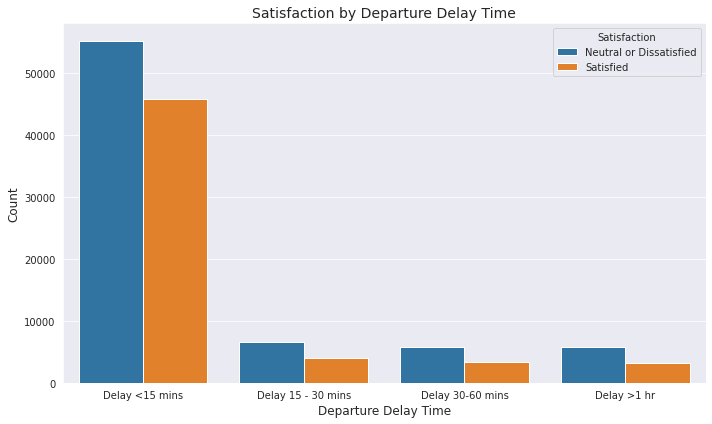

In [ ]:
deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_deptdelay, x='Departure Delay Category', hue='Satisfaction', order=deptorder)

# add titles and labels
plt.title('Satisfaction by Departure Delay Time', fontsize=14)
plt.xlabel('Departure Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# show the plot
plt.show()



###Arrival Delay

In [ ]:
df_arvdelay = df[['ID', 'Arrival Delay', 'Satisfaction']]
df_arvdelay['Arrival Delay Category'] = df_arvdelay['Arrival Delay'].apply(dept_delay_category)

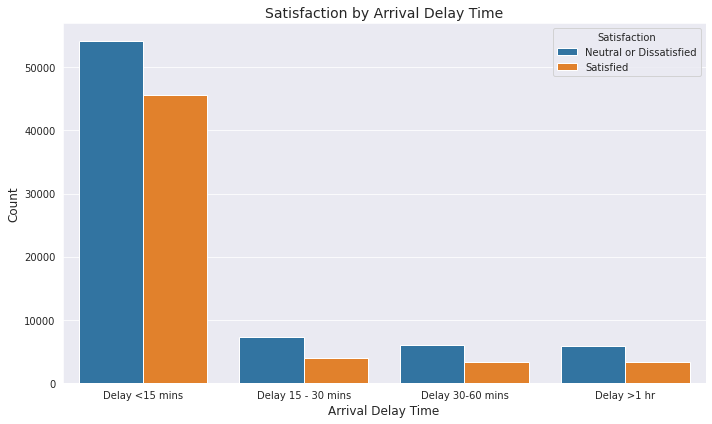

In [ ]:
deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arvdelay, x='Arrival Delay Category', hue='Satisfaction', order=deptorder)

# add titles and labels
plt.title('Satisfaction by Arrival Delay Time', fontsize=14)
plt.xlabel('Arrival Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# show the plot
plt.show()



**Objectives:**

1.  Based on the correlation heatmap, departure delay and arrival delay is highly correlated to each other so when departure delay increase, arrival delay will increase too. as can be seen on the chart, the total passengers are the same for each time in departure and arrival delay.

2. This airline is most likely to experience delays of less than 15 minutes.

3. There is a decrease in passenger satisfaction as the duration of delays increases.

##Remaining Columns Analysis

In [ ]:
data = ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',]

len(data)

18

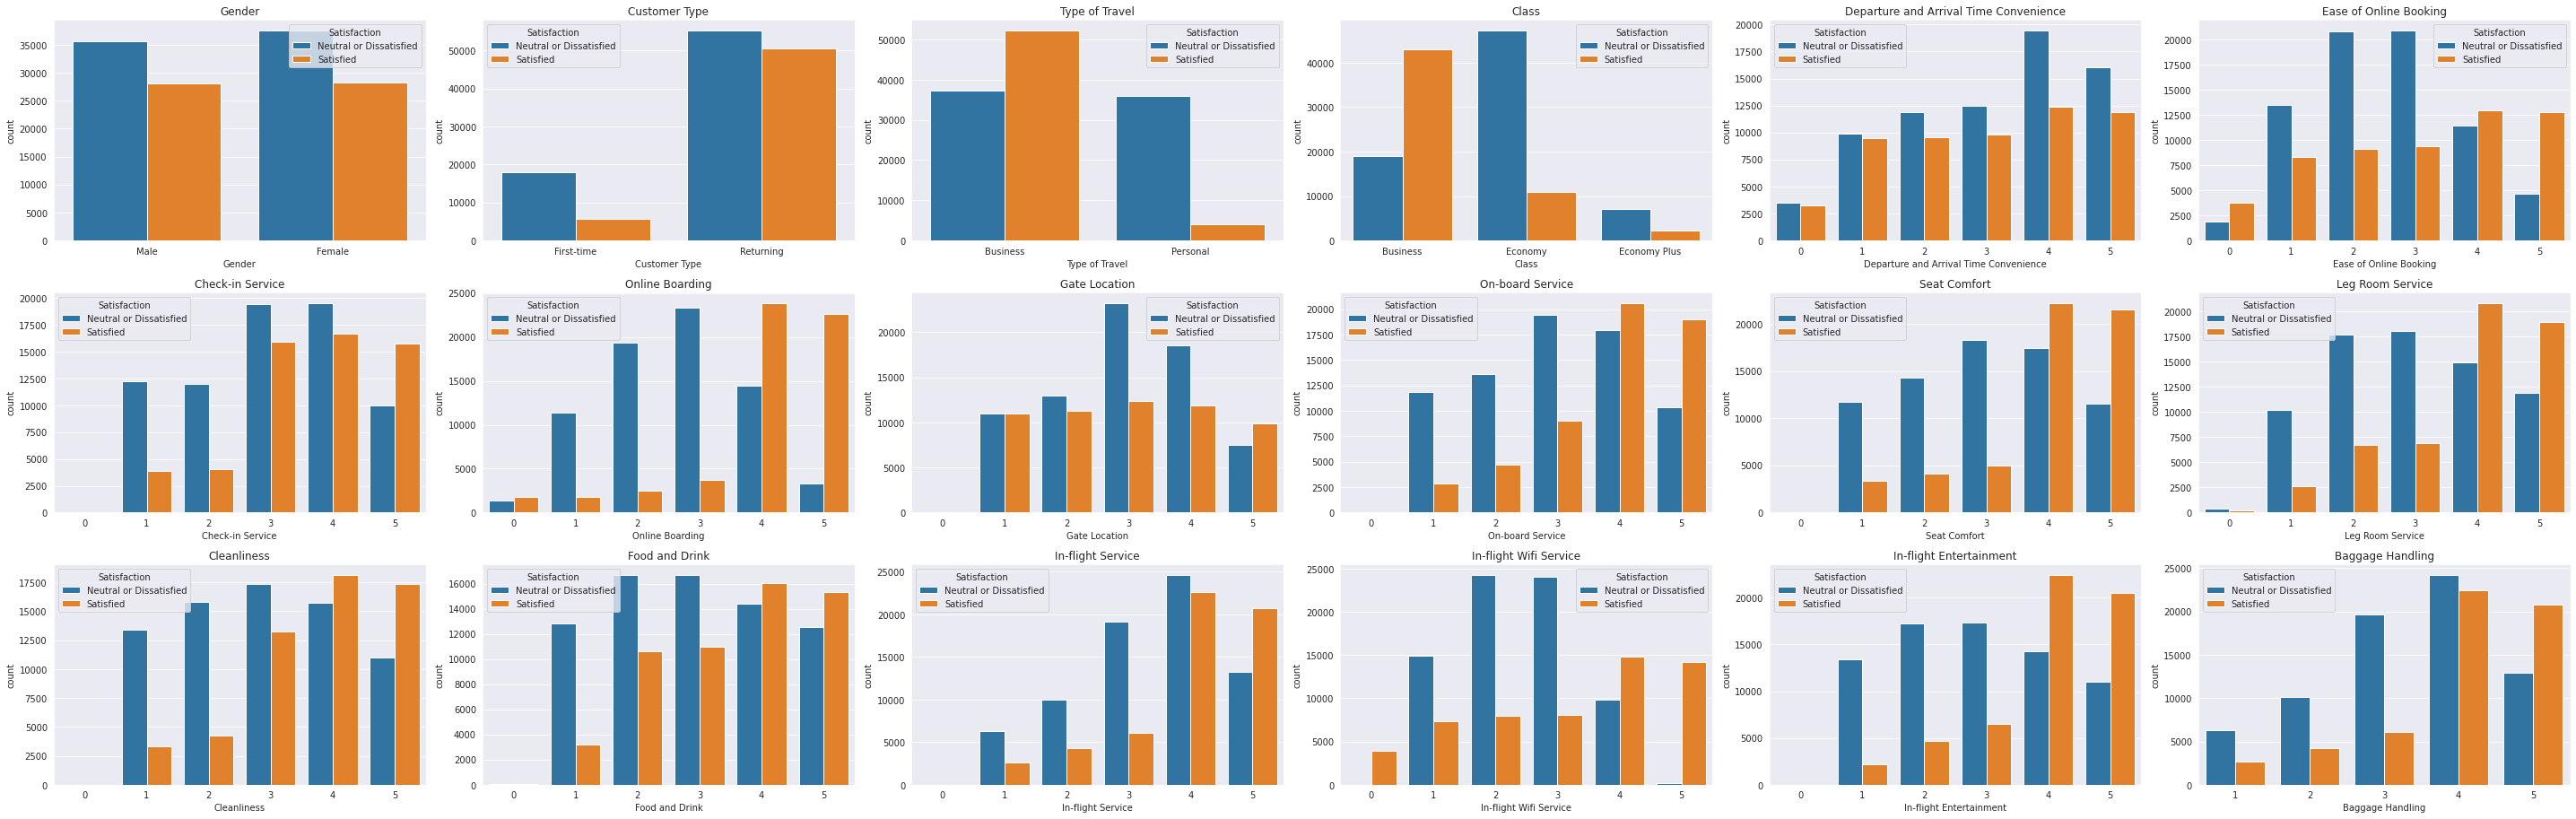

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,25))
for i in range(len(data)):
    plt.subplot(6,6,i+1)
    plt.title(data[i])
    sns.countplot(x=df[data[i]],hue=df['Satisfaction'])
     
plt.tight_layout()

**Observations (countplot & heatmap correlation):**

1. Neutral or Dissatisfied is dominated in all categories. 

2. Both gender are mostly Neutral or Dissatisfied. But the correlation coefficient shows 0.01 and -0.01 for satisfaction. it shows that there is almost no relationship between gender and satisfaction. This means that gender is not a strong predictor of customer satisfaction in this dataset.

3. Returning customer dominated the satisfaction categories but most of them are neutral or dissatisfied. the correlation coefficient of first time customer -0.19 for satisfaction and 0.19 for satisfaction returning customer suggest that there is a weak relationship between customer loyalty and satisfaction. This means that customers who have flown with the airline before tend to be more satisfied with their experience than those who are flying with the airline for the first time.

4. Passenger with the needs of business are mostly satisfied. The correlation coefficient shows moderate positive relationship for business needs and moderate negative relationship for personal needs This means that customers who are traveling for personal reasons tend to be less satisfied with their experience compared to those who are traveling for business.

5. Passenger in business class are mostly satisfied compared to economy class. from the countplot and correlation shows that as the class of the flight moves from economy to higher classes, there is a tendency for satisfaction to increase. In other words, passengers who are flying in higher classes are generally more satisfied than those who are flying in economy class.

6. although the passenger are mostly satisfied with Departure and Arrival Time Convenience, but overall they are mostly neutral or dissatisfied. the correlation shows -0.05 which means that Departure and Arrival Time Convenience is not a strong predictor of customer satisfaction in this dataset.

7. As seen on the graph, passengers are mostly neutral or dissatisfied with the Ease of Online Booking. it means for most of them the online booking is still complicated or difficult. a correlation coefficient of 0.17 shows weak relationship between  Ease of Online Booking and Satisfaction so it is not a strong predictor of customer satisfaction

8. Passenger are mostly neutral to satisfied with the check-in service. a correlation coefficient of 0.24 suggests a weak positive relationship between the two variables. This means that as satisfaction with the check-in service increases, there is a slight tendency for overall passenger satisfaction to also increase.

9. Passengers are mostly satisfied with the online boarding, but passenger who are neutral or dissatisfied with the online boarding also feel neutral or dissatisfied for overall airline services. The correlation coefficient of 0.50 shows moderate positive relationship. This means that as satisfaction with the online booking process increases, there is a tendency for overall passenger satisfaction to also increase.

10. Passengers are mostly neutral to satisfied with the gate location of the airline. from the heatmap it shows no correlation at all with the overall satisfaction so the gate location is not a factor of passenger satisfaction.

11. Passenger are satisfied with on-board service, Seat Comfort, Leg Room Service, Cleanliness, Food & Drink, In-Fligth Services, In-Flight Entertainment, and Baggage Handling. but for passenger who are dissatisfied with these services also most likely dissatisfied with overall airline service. the correlation heatmap shows positive correlation between satisfaction and these services, meaning that as these services increases, so does passenger satisfaction espesically for in-flight entertainment.

12. In-flight Wifi Service dominated by neutral or dissatisfied passenger. the correlation heatmap shows positive correlation between satisfaction and in flight wifi service. This means that as in-flight wifi service improves, there tends to be a corresponding increase in passengers' satisfaction with the airline.

#SPLITTING DATASET

In [ ]:
df = df_encoded
X = df.drop(['ID','Satisfaction'], axis=1) #Remove ID because we will not use the feature
y = df['Satisfaction']


In [ ]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (103589, 27)
Shape of test set  (25898, 27)


#MODEL & EVALUATION

In [ ]:
classifiers = [KNeighborsClassifier(n_neighbors=5),
              RandomForestClassifier(n_estimators=100, random_state=42), 
              GradientBoostingClassifier(n_estimators=100, random_state=42)]

In [ ]:


reports = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, labels=[0, 1], output_dict=True)
    df = pd.DataFrame(report).transpose()
    reports.append(df)

# Concatenate the list of DataFrames into a single DataFrame
result = pd.concat(reports, keys=[clf.__class__.__name__ for clf in classifiers])

result

precision    recall  f1-score  \
KNeighborsClassifier       0              0.731143  0.674437  0.701646   
                           1              0.767393  0.812411  0.789260   
                           accuracy       0.752993  0.752993  0.752993   
                           macro avg      0.749268  0.743424  0.745453   
                           weighted avg   0.751782  0.752993  0.751529   
RandomForestClassifier     0              0.970509  0.941271  0.955667   
                           1              0.956568  0.978366  0.967344   
                           accuracy       0.962391  0.962391  0.962391   
                           macro avg      0.963539  0.959818  0.961505   
                           weighted avg   0.962572  0.962391  0.962315   
GradientBoostingClassifier 0              0.942792  0.920559  0.931543   
                           1              0.940965  0.957748  0.949282   
                           accuracy       0.941733  0.941733  0.941733   
                           macro avg      0.941878  0.939154  0.940413   
                           weighted avg   0.941752  0.941733  0.941643   

                                              support  
KNeighborsClassifier       0             11153.000000  
                           1             14745.000000  
                           accuracy          0.752993  
                           macro avg     25898.000000  
                           weighted avg  25898.000000  
RandomForestClassifier     0             11153.000000  
                           1             14745.000000  
                           accuracy          0.962391  
                           macro avg     25898.000000  
                           weighted avg  25898.000000  
GradientBoostingClassifier 0             11153.000000  
                           1             14745.000000  
                           accuracy          0.941733  
                           macro avg     25898.000000  
                           weighted avg  25898.000000

**Objectives:**

Random Forest and Gradient Boosting performs better than KNN  in predicting the target variable and identifying the instances for this dataset

##Standard Scaler to Improve KNN Performance

In [ ]:


# Scale the features
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

# Define classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(n_estimators=100, random_state=42), 
    GradientBoostingClassifier(n_estimators=100, random_state=42)
]
reports = []
for clf in classifiers:
    if isinstance(clf, KNeighborsClassifier):
        # Use the scaled features for the KNN classifier
        clf.fit(X_train_knn, y_train)
        y_pred = clf.predict(X_test_knn)
    else:
        # Use the unscaled features for all other classifiers
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    reports.append(df)

# Concatenate the list of DataFrames into a single DataFrame
result2 = pd.concat(reports, keys=[clf.__class__.__name__ for clf in classifiers])

result2

precision    recall  f1-score  \
KNeighborsClassifier       0              0.949511  0.878508  0.912630   
                           1              0.913024  0.964666  0.938135   
                           accuracy       0.927562  0.927562  0.927562   
                           macro avg      0.931267  0.921587  0.925383   
                           weighted avg   0.928737  0.927562  0.927151   
RandomForestClassifier     0              0.970509  0.941271  0.955667   
                           1              0.956568  0.978366  0.967344   
                           accuracy       0.962391  0.962391  0.962391   
                           macro avg      0.963539  0.959818  0.961505   
                           weighted avg   0.962572  0.962391  0.962315   
GradientBoostingClassifier 0              0.942792  0.920559  0.931543   
                           1              0.940965  0.957748  0.949282   
                           accuracy       0.941733  0.941733  0.941733   
                           macro avg      0.941878  0.939154  0.940413   
                           weighted avg   0.941752  0.941733  0.941643   

                                              support  
KNeighborsClassifier       0             11153.000000  
                           1             14745.000000  
                           accuracy          0.927562  
                           macro avg     25898.000000  
                           weighted avg  25898.000000  
RandomForestClassifier     0             11153.000000  
                           1             14745.000000  
                           accuracy          0.962391  
                           macro avg     25898.000000  
                           weighted avg  25898.000000  
GradientBoostingClassifier 0             11153.000000  
                           1             14745.000000  
                           accuracy          0.941733  
                           macro avg     25898.000000  
                           weighted avg  25898.000000

**Objectives:**

1. After adding standard scaler to KNN, the model performs really well  in predicting the target variable and identifying the instances for this dataset

2. In terms of precision, recall, and F1-score, all models have higher performance metrics for class 1 (neutral or dissatisfied) than for class 0 (satisfied). This is expected since class 1 has more samples and the models are biased towards predicting the majority class.

Overall, Random Forest has the best performance for both classes based on the weighted average F1-score, with a value of 0.962.
 
KNN and Gradient Boosting have slightly lower weighted average F1-scores of 0.927 and 0.942, respectively.


#FEATURE IMPORTANCE

<Axes: xlabel='importance', ylabel='index'>

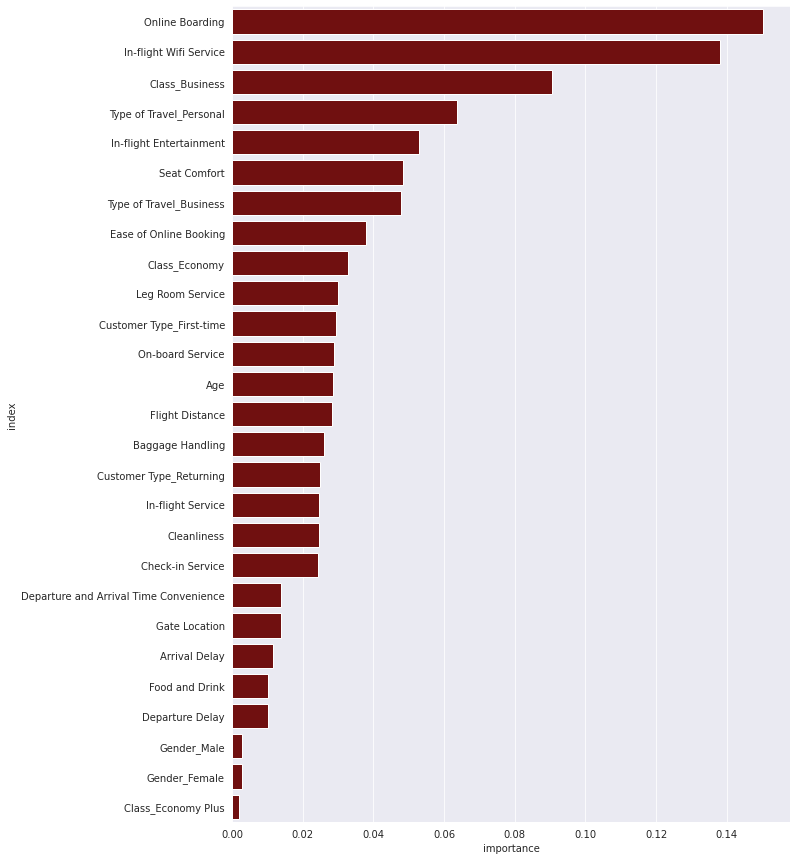

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='index', color='#800000',data=feature_importances.reset_index())


**Objectives:**

Online boarding and In-Flight Wifi Service are the most influential features that contribute the most to the prediction accuracy.

#CONCLUSION & BUSINESS RECOMMENDATION

**Conclusion**

The airline passengers satisfaction dataset is consist of 129,880 rows and 23 columns. The dataset is slightly imbalanced and has outliers in some features. To transform the non-numerical columns into numerical, I did one-hot encoding for the features and label encoding for the target variable. After encoding process, the dataset has 28 features. I split the dataset into 80% training data and 20% test data. I choose KNN, Random Forest, and Gradient boosting as the model to predict the airline passengers satisfaction since the dataset is a high-dimensional data, has outliers, and the target variable is binary *(1: neutral or dissatisfied, 0: satisfied)*. 

Before doing the data normalization, KNN performance is not relly good comparing to the other models. Then I add standard scaler to improve KNN performance with the end result Random Forest has the best performance for both classes based on the weighted average F1-score, with a value of 0.962, KNN and Gradient Boosting have slightly lower weighted average F1-scores of 0.927 and 0.942, respectively. 

From this research we can conclude that tree based models performance is better than non tree based models. The tree based models performs really well without any normalization. It proves that tree based model is robust with outlier. Meanwhile KNN needs data normalization to handle the outliers before achieving the best evaluation score. It is because the behaviour of KNN is sensitive with outlier and the scale of the input features. For this three models, the slightly imbalanced dataset is not affecting too much to their performance.

**Business Recomendation**

Most of the passengers are adults age 20-60. The most satisfied passengers are passengers in their 40s. Although the `neutral or dissatisfied` passengers is more than the `satisfied` passengers, The gap between both satisfaction in all age categories are not too big so the airline company can improve the service to retain existing passengers and reduce the number of `neutral or dissatisfied` passenger. 

The majority of the passengers type is returning passengers with business needs and most of them choose business class. People tend to choose this airline for medium to long haul flight.

from this insight company can focus on :

1. maintaining high standards of service in business class: Since most of the returning passengers choose business class, the airline company should focus on maintaining high standards of service in this class. This includes providing comfortable seats, high-quality food and drinks, and excellent customer service.

2. Offer loyalty programs and incentives for frequent business travelers: To retain their loyal customers, the airline company could offer loyalty programs and incentives such as discounts on future flights, complimentary upgrades, or exclusive access to airport lounges.

3. Enhance the in-flight entertainment options: Since many business travelers use their flight time for work or productivity, the airline company could consider enhancing the in-flight entertainment options to include more business-oriented content such as access to online productivity tools, business news, and webinars.

4. Improve the booking and check-in process: To make the travel experience more seamless and efficient for business travelers, the airline company could consider improving the booking and check-in process. This could include offering online check-in, mobile boarding passes, and expedited security lines for business class passengers.

5. Expand routes and frequencies to key business destinations: To attract more business travelers, the airline company could consider expanding its routes and frequencies to key business destinations. This could help the airline company capture a larger share of the corporate travel market and increase its revenue.
